In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
content = pd.read_csv('complete_content.csv', memory_map = False)

In [ ]:
content.head()

,sentences,label
0,"yes, in harris county, looking to put a coffee...",0
1,this is an automated acknowledgement that your...,0
2,Please let me know your thoughts about partici...,1
3,i would like to get agreement within ena and t...,0
4,insigna we stood fast ont he 6 month nonsolici...,0


In [ ]:
content = content[['sentences', 'label']]

Text(0, 0.5, 'Frequency')

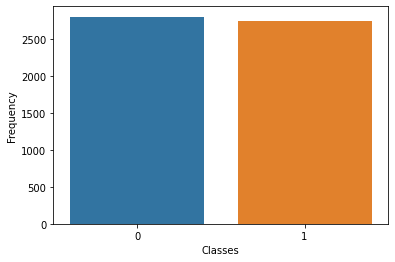

In [ ]:
sns.countplot(x = 'label', data = content)
plt.xlabel('Classes')
plt.ylabel('Frequency')

In [ ]:
!pip install contractions
import contractions
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import spacy
import re
nlp = spacy.load('en')
def preprocessing(text):
  text = text.replace('#','')
  text = contractions.fix(text)
  text = re.sub('\S*@\S*\s?',' ',text)
  text = re.sub('https?://\S+|www\.\S+',' ',text)
  text = re.sub('<.*?>',' ',text)
  token= list()
  text = re.sub('[^A-z]', ' ',text)

  lemmatizer = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  preprocessed_sent = ' '.join([lemmatizer.lemmatize(temp.lower()) for temp in text.split() if len(temp)>2])
  return preprocessed_sent

In [ ]:
content['preprocessed_sentences'] = content['sentences'].apply(lambda x : preprocessing(x))

In [ ]:
content.to_csv('preprocessed_sentences.csv')

In [ ]:
content.isnull().sum()

sentences                 0
label                     0
preprocessed_sentences    0
dtype: int64

In [ ]:
content.to_csv('preprocessed_data.csv')

In [ ]:
content['sentences'].isnull().sum()

0

In [ ]:
preprocessed_content = pd.read_csv('preprocessed_sentences.csv')

In [ ]:
preprocessed_content.isnull().sum()

Unnamed: 0                0
sentences                 0
label                     0
preprocessed_sentences    0
dtype: int64

In [ ]:
preprocessed_content = preprocessed_content.dropna(axis=0)

In [ ]:
list(preprocessed_content['label']).count(0)
list(preprocessed_content['label']).count(1)

2739

In [ ]:
x = preprocessed_content['preprocessed_sentences']
y = preprocessed_content['label']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)
xtrain=x
yrain=y


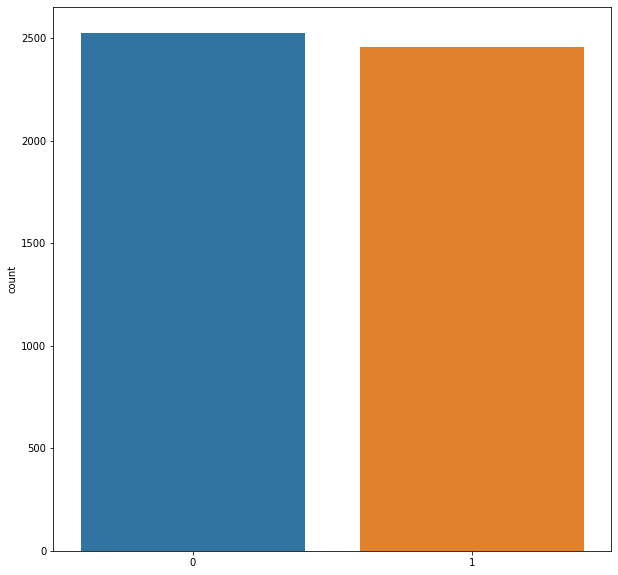

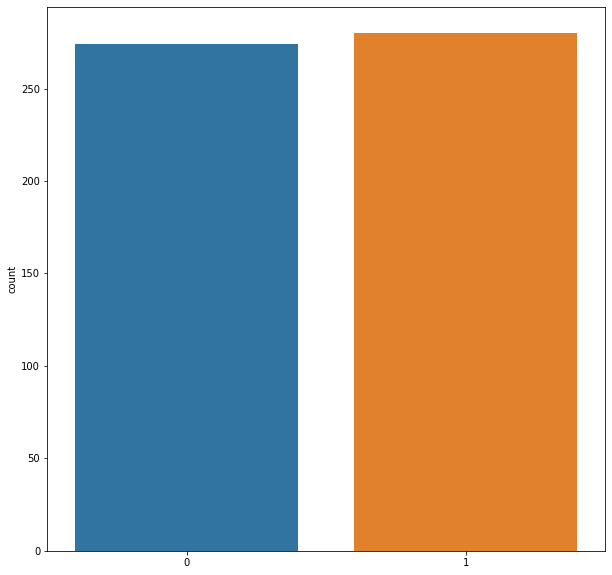

In [ ]:
for temp in [ytrain, ytest]:
  plt.figure(figsize=(10, 10))
  sns.countplot(x=temp.values)

In [ ]:
xtrain

0       invest stock and also diversify your portfolio...
1       doug per our conversation will you please forw...
2                         call after you get this message
3       please keep you eye open for similar initiativ...
4                would you please kind and take peek this
                              ...                        
5534    susan please the lookout for tariff filing com...
5535    please keep this email invoice for your record...
5536    with respect your specific suggestion below ar...
5537      call when you have chance talk through the list
5538                you have already got both these thing
Name: preprocessed_sentences, Length: 5539, dtype: object

In [ ]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
xtrain, ytrain  = oversample.fit_resample(np.array(xtrain).reshape(-1, 1) , np.array(ytrain).reshape(-1, 1))
xtrain = [temp[0] for temp in xtrain]
ytrain = [temp for temp in ytrain]
content_train = pd.DataFrame({'sentences':xtrain, 'labels':ytrain})
content_test = pd.DataFrame({'sentences':xtest, 'labels':ytest})

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

ValueError: ignored

In [ ]:
!pip install transformers
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

     |████████████████████████████████| 2.6 MB 5.1 MB/s 
     |████████████████████████████████| 636 kB 72.4 MB/s 
     |████████████████████████████████| 3.3 MB 46.1 MB/s 
     |████████████████████████████████| 895 kB 52.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
def bert_encode(data,maximum_length) :
  input_ids = []
  attention_masks = []
  
  
  for temp in data:
      encoded = tokenizer.encode_plus(
        
        temp,
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        
        return_attention_mask=True
        
      )
      # print(i)
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

In [ ]:
lengths = sorted([len(temp.split()) for temp in x], reverse=True)
print('Top 10 lengths : ',lengths[:10])
import statistics
print('Max length : ', max(lengths))
print('Median : ',statistics.median(lengths))

Top 10 lengths :  [392, 84, 82, 79, 76, 72, 69, 68, 67, 67]
Max length :  392
Median :  11


In [ ]:
max_len = 33

In [ ]:
train_input_ids,train_attention_masks = bert_encode(xtrain, max_len)
test_input_ids,test_attention_masks = bert_encode(xtest, max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
def create_model(bert_model, max_len):
  input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
  attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
  
  output = bert_model([input_ids,attention_masks])
  output = output[1]



  output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
  model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
  model.compile(Adam(lr=6e-6), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model = create_model(bert_model, max_len)
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 33)]         0                                            
__________________________________________________________________________________________________
input_30 (InputLayer)           [(None, 33)]         0                                            
__________________________________________________________________________________________________
tf_bert_model_14 (TFBertModel)  TFBaseModelOutputWit 109482240   input_29[0][0]                   
                                                                 input_30[0][0]                   
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 1)            769         tf_bert_model_14[0][1]    

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit([train_input_ids,train_attention_masks], np.array(ytrain), validation_split=0.1, epochs=4, batch_size=1)

Epoch 1/4
6982/6982 [==============================] - 318s 44ms/step - loss: 0.3766 - accuracy: 0.8356 - val_loss: 0.3164 - val_accuracy: 0.8634
Epoch 2/4
6982/6982 [==============================] - 305s 44ms/step - loss: 0.2495 - accuracy: 0.8999 - val_loss: 0.3490 - val_accuracy: 0.8518
Epoch 3/4
6982/6982 [==============================] - 306s 44ms/step - loss: 0.1548 - accuracy: 0.9423 - val_loss: 0.4067 - val_accuracy: 0.8737
Epoch 4/4
6982/6982 [==============================] - 306s 44ms/step - loss: 0.0878 - accuracy: 0.9714 - val_loss: 0.4898 - val_accuracy: 0.8660


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save_weights('my_checkpoint')

In [ ]:
result = model.predict([test_input_ids,test_attention_masks])
result = np.round(result).astype(int)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, result)
print('Accuracy Score : ',accuracy)


Accuracy Score :  0.8863109048723898


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
print('accuracy score : ',accuracy_score(ytest, result))
print('f1 score : ',f1_score(ytest, result))
print('precision score : ',precision_score(ytest, result))
print('recall score : ',recall_score(ytest, result))

accuracy score :  0.8863109048723898
f1 score :  0.8881278538812786
precision score :  0.8901601830663616
recall score :  0.8861047835990888


In [ ]:
resultant = pd.DataFrame({'actual': ytest, 'predict': [x[0] for x in result]})
resultant.value_counts()

actual  predict
1       1          62
0       0          57
        1          27
1       0           9
dtype: int64

In [ ]:
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
train_encodings = tokenizer([x for x in xtrain], truncation=True, padding=True)
test_encodings = tokenizer([x for x in xtest], truncation=True, padding=True)

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-cased')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_encodings['label'] = ytrain
test_encodings['label'] = ytest

In [ ]:
outputs = model(train_encodings)

In [ ]:
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_encodings,         # training dataset
    eval_dataset=test_encodings             # evaluation dataset
)

AttributeError: ignored

   Unnamed: 0  label                                          sentences
0           0      0                               here -PRON- forecast
1           1      0  travel have business meeting take the fun out ...
2           2      0        especially -PRON- have prepare presentation
3           3      0  would suggest hold the business plan meeting h...
4           4      0  would even try and get some honest opinion whe...
********************
Unnamed: 0       0
label            0
sentences     1188
dtype: int64
****************************************
Before Removing NaNs
Count of Action Item  5888
Count of Non-Action Item  40356
****************************************
After Removing NaNs
Count of Action Item  5882
Count of Non-Action Item  39174
****************************************


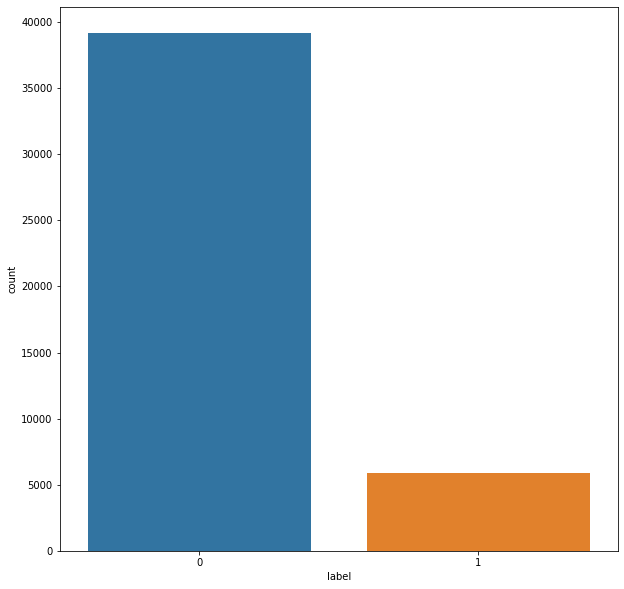

****************************************
39174
5882
9174
5882


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.



Maximum length : 472


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 472)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 472)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           24608       tf_bert_model[0][1]          

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

content = pd.read_csv('preprocessed_data.csv')
print(content.head())


#Null Values
print('*'*20)
print(content.isnull().sum()) 
print('*'*40)
print('Before Removing NaNs')
print('Count of Action Item ',[x for x in content['label']].count(1))
print('Count of Non-Action Item ',[x for x in content['label']].count(0))
print('*'*40)
content = content.dropna(axis=0)
print('After Removing NaNs')
print('Count of Action Item ',[x for x in content['label']].count(1))
print('Count of Non-Action Item ',[x for x in content['label']].count(0))
print('*'*40)

#Distribution of classes
plt.figure(figsize=(10, 10))
sns.countplot(x = 'label', data = content)
plt.show()
print('*'*40)
print(list(content['label']).count(0))
print(list(content['label']).count(1))

content = content.sort_values('label', ascending=True)
content = content.iloc[30000:, :]
print(list(content['label']).count(0))
print(list(content['label']).count(1))

#Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(content['sentences'], content['label'], test_size = 0.2)
# print('Shape of xtrain : ',len(xtrain))
# print('Shape of ytrain : ',len(ytrain))
# print('Shape of xtest : ',len(xtest))
# print('Shape of ytest : ',len(ytest))



#Random Oversampling in train set
import numpy as np
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
xtrain, ytrain  = oversample.fit_resample(np.array(xtrain).reshape(-1, 1) , np.array(ytrain).reshape(-1, 1))
xtrain = [temp[0] for temp in xtrain]
ytrain = [temp for temp in ytrain]

# content_train = pd.DataFrame({'sentences':xtrain, 'labels':ytrain})
# content_test = pd.DataFrame({'sentences':xtest, 'labels':ytest})

# print('Shape of xtrain : ',len(xtrain))
# print('Shape of ytrain : ',len(ytrain))
# print('Shape of xtest : ',len(xtest))
# print('Shape of ytest : ',len(ytest))

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
import numpy as np
import tensorflow as tf

def bert_encode(data,maximum_length) :
  input_ids = []
  attention_masks = []
  
  
  for temp in data:
      encoded = tokenizer.encode_plus(
        
        temp,
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        
        return_attention_mask=True
        
      )
      # print(temp)
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)


max_len = max([len(temp.split()) for temp in content['sentences']])
print('Maximum length :',max_len)

train_input_ids,train_attention_masks = bert_encode(xtrain, max_len)
test_input_ids,test_attention_masks = bert_encode(xtest, max_len)

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
def create_model(bert_model, max_len):
  input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
  attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
  
  output = bert_model([input_ids,attention_masks])
  output = output[1]
  output = tf.keras.layers.Dense(32,activation='relu')(output)
  output = tf.keras.layers.Dropout(0.2)(output)

  output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
  model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
  model.compile(Adam(lr=6e-6), loss='binary_crossentropy', metrics=['accuracy'])
  return model

from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')


model = create_model(bert_model, max_len)
model.summary()
print('Training Started')
history = model.fit([train_input_ids,train_attention_masks], np.array(ytrain), validation_split=0.2, epochs=2, batch_size=10)
print('Training Completed')
model.save_weights('my_checkpoint')
print('Model Saved')
result = model.predict([test_input_ids,test_attention_masks])
result = np.round(result).astype(int)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, result)
print('Accuracy Score : ',accuracy)




In [ ]:
!pip install transformers
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
print('accuracy score : ',accuracy_score(ytest, result))
print('f1 score : ',f1_score(ytest, result))
print('precision score : ',precision_score(ytest, result))
print('recall score : ',recall_score(ytest, result))

accuracy score :  0.9266268260292164
f1 score :  0.9087907552620718
precision score :  0.8843373493975903
recall score :  0.934634974533107


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/checkpoint /content/gdrive/MyDrive/Intellica/Minutes/V4

In [ ]:
!cp /content/my_checkpoint.data-00000-of-00001 /content/gdrive/MyDrive/Intellica/Minutes/V4

In [ ]:
!cp /content/my_checkpoint.index /content/gdrive/MyDrive/Intellica/Minutes/V4

In [ ]:
!cp /content/preprocessed_sentences.csv /content/gdrive/MyDrive/Intellica/Minutes/V4

# Inference

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
!pip install transformers
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
max_len = 33
import pandas as pd
import numpy as np
import spacy
import re
nlp = spacy.load('en')
def preprocessing(text):
  text = text.replace('#','')
  text = contractions.fix(text)
  text = re.sub('\S*@\S*\s?',' ',text)
  text = re.sub('https?://\S+|www\.\S+',' ',text)
  text = re.sub('<.*?>',' ',text)
  token= list()
  text = re.sub('[^A-z]', ' ',text)

  lemmatizer = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  preprocessed_sent = ' '.join([lemmatizer.lemmatize(temp.lower()) for temp in text.split() if len(temp)>2])
  return preprocessed_sent


content = pd.read_csv('failed_test_cases.csv')
xtest = [preprocessing(x) for x in content['sentences']]
ytest = [x for x in content['label']]

def bert_encode(data,maximum_length) :
  input_ids = []
  attention_masks = []
  
  
  for temp in data:
      encoded = tokenizer.encode_plus(
        
        temp,
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        
        return_attention_mask=True
        
      )
      # print(temp)
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

test_input_ids,test_attention_masks = bert_encode(xtest, max_len)



from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
def create_model(bert_model, max_len):
  input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
  attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
  
  output = bert_model([input_ids,attention_masks])
  output = output[1]
  # output = tf.keras.layers.Dense(16,activation='relu')(output)
  # output = tf.keras.layers.Dropout(0.2)(output)

  output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
  model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
  model.compile(Adam(lr=6e-6), loss='binary_crossentropy', metrics=['accuracy'])
  return model


model = create_model(bert_model, max_len)
model.load_weights('my_checkpoint')

result = model.predict([test_input_ids,test_attention_masks])
result = np.round(result).astype(int)
# print(result)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, result)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertMod

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
accuracy

0.7677419354838709

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest, result)
cf

array([[59, 25],
       [11, 60]])

In [ ]:
result_df = pd.DataFrame({'actual': ytest, 'predicted': [x[0] for x in result]})
result_df.value_counts()

actual  predicted
1       1            60
0       0            59
        1            25
1       0            11
dtype: int64

In [ ]:
result_df['preprocessed_sentences'] = xtest
result_df['sentences'] = content['sentences']

In [ ]:
result_df.to_csv('v1_results_failed.csv')